NLP Tutorial - Text Representation: TF-IDF

What is TF-IDF?

TF stands for Term Frequency and denotes the ratio of number of times a particular word appeared in a Document to total number of words in the document.

   Term Frequency(TF) = [number of times word appeared / total no of words in a document]
Term Frequency values ranges between 0 and 1. If a word occurs more number of times, then it's value will be close to 1.

IDF stands for Inverse Document Frequency and denotes the log of ratio of total number of documents/datapoints in the whole dataset to the number of documents that contains the particular word.

   Inverse Document Frequency(IDF) = [log(Total number of documents / number of documents that contains the word)]
In IDF, if a word occured in more number of documents and is common across all documents, then it's value will be less and ratio will approaches to 0.

Finally:

   TF-IDF = Term Frequency(TF) * Inverse Document Frequency(IDF)

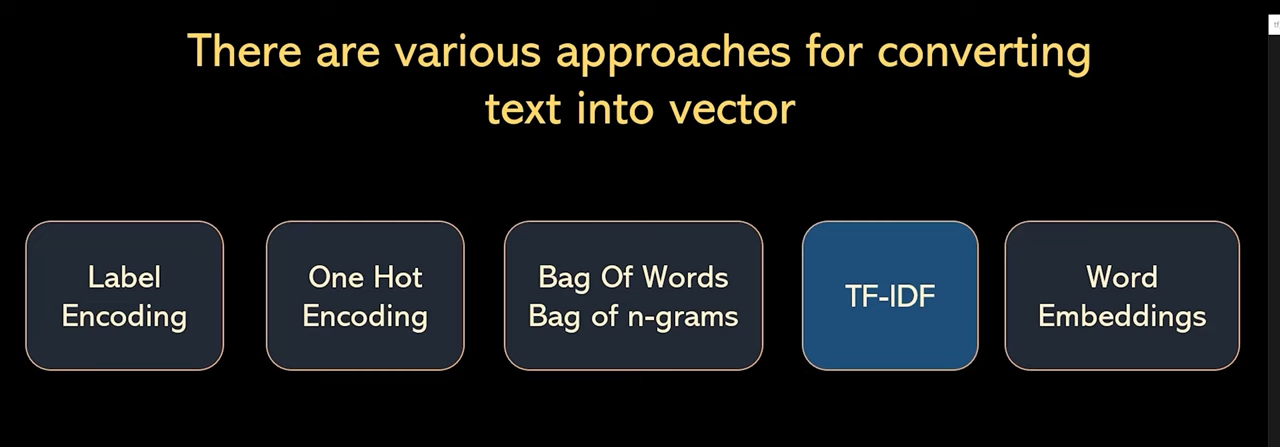

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]